In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
embedding_cols = ['tfidf_embedding', 'tfidf_ngrams', 'glove_embedding', 'w2v_embedding', 'bert_embedding']
feature_cols = ['gunning_fog', 'smog_index', 'subjectivity', 'title_text_similarity', 'words_per_sentence',
    'adv_ratio_title', 'noun_ratio_title', 'words_per_title', 'syllables_per_word',
    'uppercase_per_title', 'uppercase_ratio_title_text', 'adj_ratio_text', 'adv_ratio_text',
    'verb_ratio_text', 'noun_ratio_text', 'short_sentences_ratio', 'long_sentences_ratio']
target_col = 'label'
save_dir = "svc_results"
os.makedirs(save_dir, exist_ok=True)

In [3]:
def embedding_converter(x):
    if pd.isna(x) or x.strip() == '':
        return np.array([])
    x_clean = x.replace('\n', ' ').strip('[]')
    return np.fromstring(x_clean, sep=' ')

In [4]:
def load_data():
    df_train = pd.read_csv('train_embeddings.csv')
    df_val = pd.read_csv('val_embeddings.csv')
    df_test = pd.read_csv('test_embeddings.csv')

    for col in embedding_cols:
        for df in [df_train, df_val, df_test]:
            df[col] = df[col].apply(embedding_converter)

    return df_train, df_val, df_test

In [5]:
def evaluate_and_plot(model, X_test, y_test, title_prefix):
    y_pred = model.predict(X_test)
    print(f"\nAccuracy ({title_prefix}): {accuracy_score(y_test, y_pred):.4f}")
    print(f"\nClassification Report ({title_prefix}):")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"\nConfusion Matrix ({title_prefix}):")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix ({title_prefix})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    joblib.dump(model, f"{save_dir}/{title_prefix}_model.pkl")

In [6]:
df_train, df_val, df_test = load_data()

y_train = df_train[target_col].values
y_val = df_val[target_col].values
y_test = df_test[target_col].values

X_train_feat = df_train[feature_cols].values
X_val_feat = df_val[feature_cols].values
X_test_feat = df_test[feature_cols].values

C:\Users\holte\AppData\Local\Temp\ipykernel_18264\544128833.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(x_clean, sep=' ')



================== tfidf_embedding (doar embedding) ==================
Best C (embedding only): 0.01 (val acc = 0.5571)

Accuracy (tfidf_embedding_only): 0.5571

Classification Report (tfidf_embedding_only):
              precision    recall  f1-score   support

           0     0.5571    1.0000    0.7156      6883
           1     0.0000    0.0000    0.0000      5471

    accuracy                         0.5571     12354
   macro avg     0.2786    0.5000    0.3578     12354
weighted avg     0.3104    0.5571    0.3987     12354


Confusion Matrix (tfidf_embedding_only):


C:\Users\holte\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\holte\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\holte\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

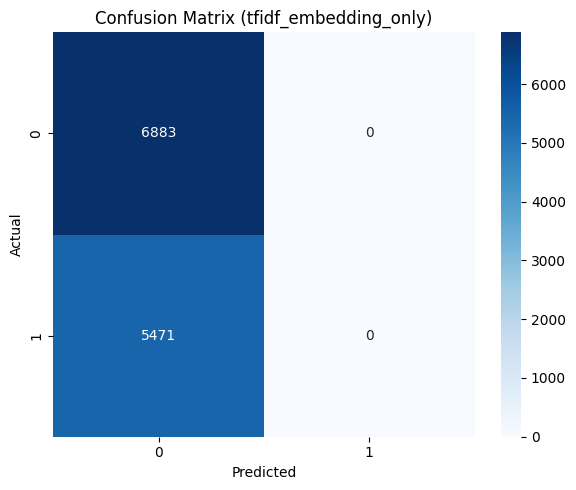


================== tfidf_embedding + features ==================
Best C (with features): 1 (val acc = 0.8694)

Accuracy (tfidf_embedding_with_features): 0.8577

Classification Report (tfidf_embedding_with_features):
              precision    recall  f1-score   support

           0     0.8536    0.8987    0.8756      6883
           1     0.8635    0.8061    0.8338      5471

    accuracy                         0.8577     12354
   macro avg     0.8586    0.8524    0.8547     12354
weighted avg     0.8580    0.8577    0.8571     12354


Confusion Matrix (tfidf_embedding_with_features):


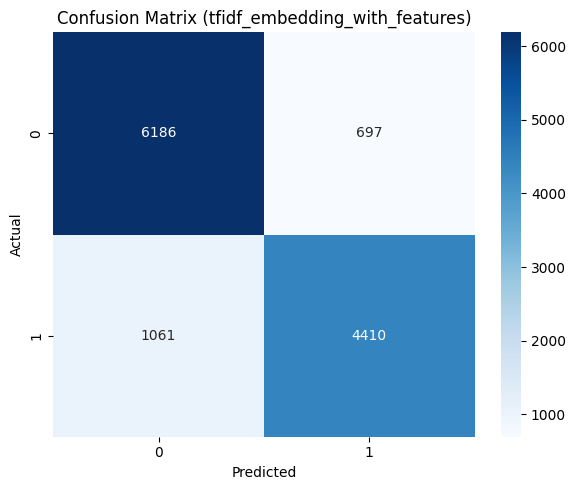


================== tfidf_ngrams (doar embedding) ==================
Best C (embedding only): 0.01 (val acc = 0.5594)

Accuracy (tfidf_ngrams_only): 0.5605

Classification Report (tfidf_ngrams_only):
              precision    recall  f1-score   support

           0     0.5592    0.9984    0.7168      6883
           1     0.8281    0.0097    0.0192      5471

    accuracy                         0.5605     12354
   macro avg     0.6936    0.5040    0.3680     12354
weighted avg     0.6783    0.5605    0.4079     12354


Confusion Matrix (tfidf_ngrams_only):


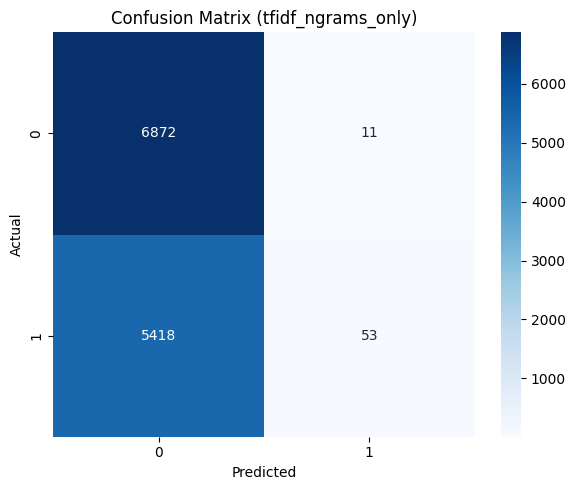


================== tfidf_ngrams + features ==================
Best C (with features): 0.01 (val acc = 0.8703)

Accuracy (tfidf_ngrams_with_features): 0.8583

Classification Report (tfidf_ngrams_with_features):
              precision    recall  f1-score   support

           0     0.8550    0.8980    0.8760      6883
           1     0.8630    0.8084    0.8348      5471

    accuracy                         0.8583     12354
   macro avg     0.8590    0.8532    0.8554     12354
weighted avg     0.8586    0.8583    0.8578     12354


Confusion Matrix (tfidf_ngrams_with_features):


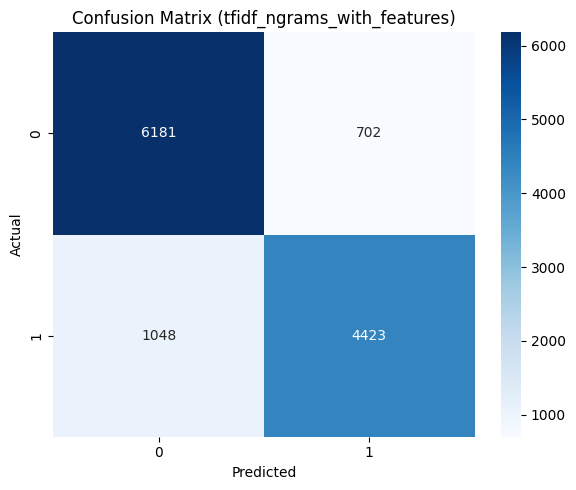


================== glove_embedding (doar embedding) ==================
Best C (embedding only): 1 (val acc = 0.8465)

Accuracy (glove_embedding_only): 0.8390

Classification Report (glove_embedding_only):
              precision    recall  f1-score   support

           0     0.8529    0.8592    0.8560      6883
           1     0.8212    0.8136    0.8174      5471

    accuracy                         0.8390     12354
   macro avg     0.8371    0.8364    0.8367     12354
weighted avg     0.8389    0.8390    0.8389     12354


Confusion Matrix (glove_embedding_only):


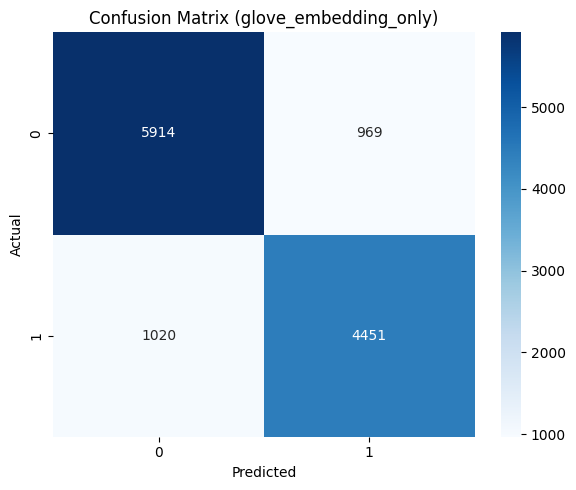


================== glove_embedding + features ==================
Best C (with features): 1 (val acc = 0.9202)

Accuracy (glove_embedding_with_features): 0.9104

Classification Report (glove_embedding_with_features):
              precision    recall  f1-score   support

           0     0.9130    0.9275    0.9202      6883
           1     0.9069    0.8889    0.8978      5471

    accuracy                         0.9104     12354
   macro avg     0.9100    0.9082    0.9090     12354
weighted avg     0.9103    0.9104    0.9103     12354


Confusion Matrix (glove_embedding_with_features):


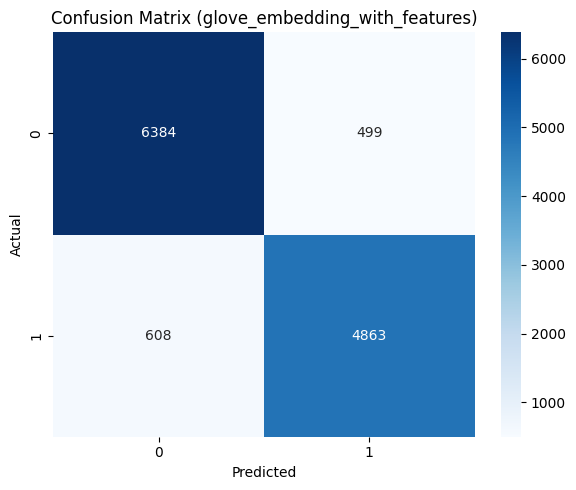


================== w2v_embedding (doar embedding) ==================
Best C (embedding only): 0.01 (val acc = 0.8985)

Accuracy (w2v_embedding_only): 0.8957

Classification Report (w2v_embedding_only):
              precision    recall  f1-score   support

           0     0.9034    0.9101    0.9067      6883
           1     0.8858    0.8775    0.8816      5471

    accuracy                         0.8957     12354
   macro avg     0.8946    0.8938    0.8942     12354
weighted avg     0.8956    0.8957    0.8956     12354


Confusion Matrix (w2v_embedding_only):


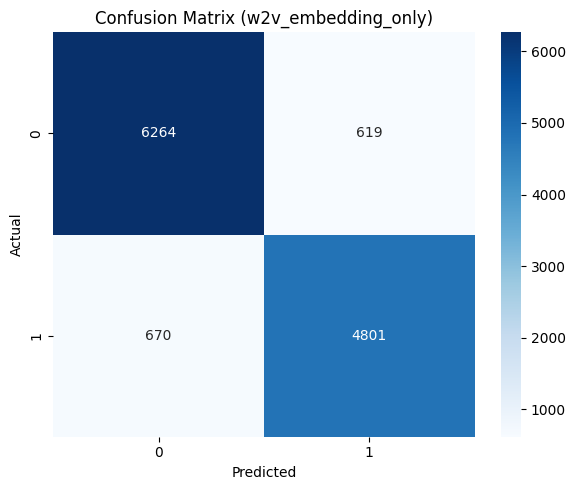


================== w2v_embedding + features ==================
Best C (with features): 0.01 (val acc = 0.9451)

Accuracy (w2v_embedding_with_features): 0.9382

Classification Report (w2v_embedding_with_features):
              precision    recall  f1-score   support

           0     0.9385    0.9515    0.9450      6883
           1     0.9379    0.9216    0.9297      5471

    accuracy                         0.9382     12354
   macro avg     0.9382    0.9365    0.9373     12354
weighted avg     0.9382    0.9382    0.9382     12354


Confusion Matrix (w2v_embedding_with_features):


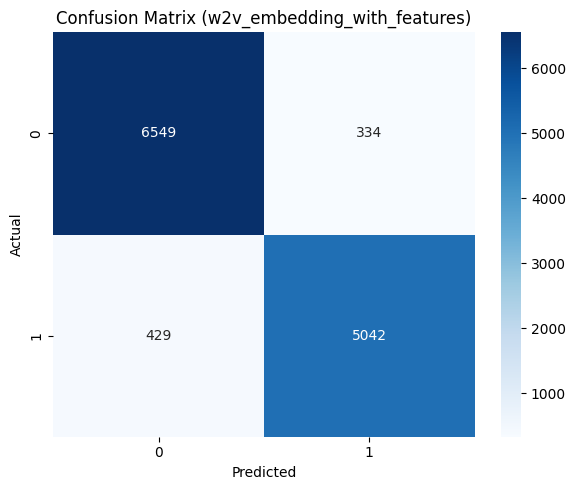


================== bert_embedding (doar embedding) ==================
Best C (embedding only): 0.01 (val acc = 0.9065)

Accuracy (bert_embedding_only): 0.8974

Classification Report (bert_embedding_only):
              precision    recall  f1-score   support

           0     0.8969    0.9217    0.9091      6883
           1     0.8979    0.8668    0.8821      5471

    accuracy                         0.8974     12354
   macro avg     0.8974    0.8942    0.8956     12354
weighted avg     0.8974    0.8974    0.8972     12354


Confusion Matrix (bert_embedding_only):


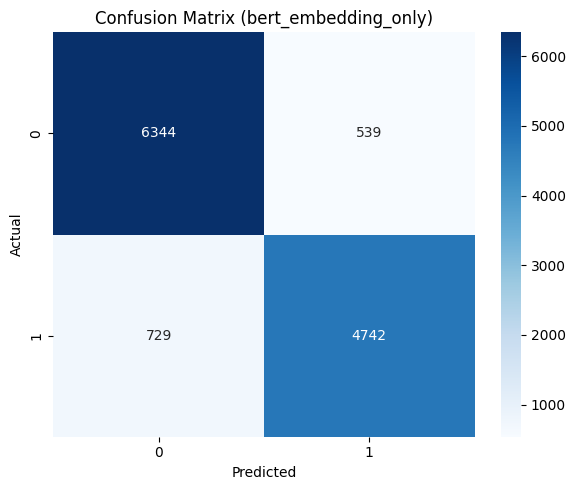


================== bert_embedding + features ==================
Best C (with features): 0.01 (val acc = 0.9456)

Accuracy (bert_embedding_with_features): 0.9372

Classification Report (bert_embedding_with_features):
              precision    recall  f1-score   support

           0     0.9329    0.9560    0.9443      6883
           1     0.9428    0.9135    0.9280      5471

    accuracy                         0.9372     12354
   macro avg     0.9379    0.9348    0.9361     12354
weighted avg     0.9373    0.9372    0.9371     12354


Confusion Matrix (bert_embedding_with_features):


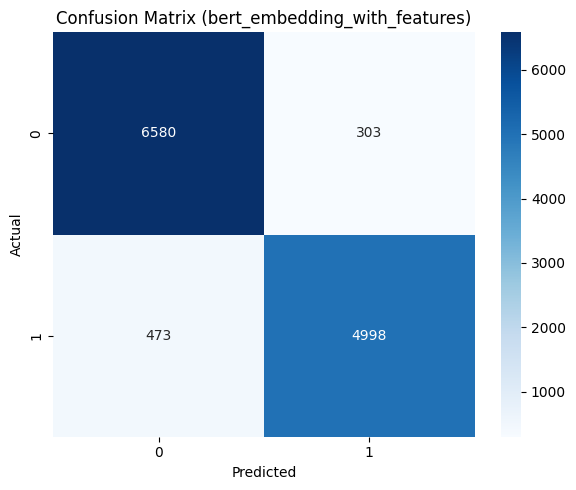

In [7]:
for col in embedding_cols:
    print(f"\n================== {col} (doar embedding) ==================")

    X_train_emb = np.vstack(df_train[col].values)
    X_val_emb = np.vstack(df_val[col].values)
    X_test_emb = np.vstack(df_test[col].values)

    scaler_emb = StandardScaler()
    X_train_emb_std = scaler_emb.fit_transform(X_train_emb)
    X_val_emb_std = scaler_emb.transform(X_val_emb)
    X_test_emb_std = scaler_emb.transform(X_test_emb)

    # Tuning cu LinearSVC + CalibratedClassifierCV
    best_c = None
    best_acc = 0
    for C in [0.01, 0.1, 1, 10]:
        base_model = LinearSVC(C=C, max_iter=10000)
        model = CalibratedClassifierCV(base_model)
        model.fit(X_train_emb_std, y_train)
        acc = accuracy_score(y_val, model.predict(X_val_emb_std))
        if acc > best_acc:
            best_acc = acc
            best_c = C
    print(f"Best C (embedding only): {best_c} (val acc = {best_acc:.4f})")

    base_model = LinearSVC(C=best_c, max_iter=10000)
    final_model = CalibratedClassifierCV(base_model)
    final_model.fit(X_train_emb_std, y_train)
    evaluate_and_plot(final_model, X_test_emb_std, y_test, f"{col}_only")

    print(f"\n================== {col} + features ==================")

    X_train_comb = np.hstack([X_train_feat, X_train_emb])
    X_val_comb = np.hstack([X_val_feat, X_val_emb])
    X_test_comb = np.hstack([X_test_feat, X_test_emb])

    scaler_comb = StandardScaler()
    X_train_comb_std = scaler_comb.fit_transform(X_train_comb)
    X_val_comb_std = scaler_comb.transform(X_val_comb)
    X_test_comb_std = scaler_comb.transform(X_test_comb)

    best_c = None
    best_acc = 0
    for C in [0.01, 0.1, 1, 10]:
        base_model = LinearSVC(C=C, max_iter=10000)
        model = CalibratedClassifierCV(base_model)
        model.fit(X_train_comb_std, y_train)
        acc = accuracy_score(y_val, model.predict(X_val_comb_std))
        if acc > best_acc:
            best_acc = acc
            best_c = C
    print(f"Best C (with features): {best_c} (val acc = {best_acc:.4f})")

    base_model = LinearSVC(C=best_c, max_iter=10000)
    final_model = CalibratedClassifierCV(base_model)
    final_model.fit(X_train_comb_std, y_train)
    evaluate_and_plot(final_model, X_test_comb_std, y_test, f"{col}_with_features")